In [1]:
from sklearn import manifold
import numpy as np
import json
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt
%matplotlib inline

input_path = "./model/word-emb.json"
#input_path = "./model/word-emb_POS.json"

print "loading histogram emb"
with open(input_path) as f_in:
    neighbor_w = json.load(f_in)

w_d2_ind = {}

bin_num = 0

neighbor_w_int = {}

ind_l2_w = []
for w in neighbor_w:
    if len(neighbor_w[w]) == 0:
        continue
    w_d2_ind[w] = len(w_d2_ind)
    ind_l2_w.append(w)
    neighbor_w_int[w] = {int(d): v for d,v in neighbor_w[w].items()}
    bin_num_w_max = np.max(neighbor_w_int[w].keys())
    if bin_num_w_max > bin_num:
        bin_num = bin_num_w_max

bin_num += 1
print "bin number: ", bin_num

vocab_size = len(w_d2_ind)
print "vocabulary size: ", vocab_size

X = np.zeros( (bin_num, vocab_size) )

for w in neighbor_w_int:
    w_ind = w_d2_ind[w]
    for d, v in neighbor_w_int[w].items():
        X[d, w_ind] = v

top_k = 100
top_k_words = []
top_k_words_w = []
middle_k_words = []
middle_start = 50
for i in range(bin_num):
    top_k_word_i = []
    top_k_word_i_w = []
    middle_k_word_i = []
    for w_ind in X[i,:].argsort()[-(top_k+1):][::-1]:
        if ind_l2_w[w_ind] == 'UUUNKKK':
            continue
        top_k_word_i.append(ind_l2_w[w_ind])
        top_k_word_i_w.append(X[i,w_ind])
    top_k_words.append(top_k_word_i[:top_k])
    top_k_words_w.append(top_k_word_i_w[:top_k])
    
    for w_ind in X[i,:].argsort()[-(middle_start+top_k+1):-middle_start][::-1]:
        if ind_l2_w[w_ind] == 'UUUNKKK':
            continue
        middle_k_word_i.append(ind_l2_w[w_ind])
    middle_k_words.append(middle_k_word_i[:top_k])

print top_k_words[0]





loading histogram emb
bin number:  100
vocabulary size:  46614
[u'take', u'give', u'place', u'player', u'hand', u'position', u'order', u'name', u'play', u'allow', u'must', u'control', u'choose', u'opponent', u'hold', u'turn', u'card', u'move', u'advantage', u'put', u'offer', u'role', u'event', u'action', u'piece', u'chance', u'will', u'pawn', u'chess', u'part', u'table', u'birth', u'ask', u'game', u'power', u'instead', u'step', u'determine', u'refuse', u'account', u'command', u'decide', u'rise', u'ability', u'keep', u'away', u'opportunity', u'list', u'leave', u'back', u'immediately', u'bishop', u'need', u'office', u'head', u'possible', u'king', u'set', u'course', u'ball', u'option', u'enemy', u'choice', u'title', u'battle', u'knight', u'capture', u'board', u'bet', u'unless', u'strategy', u'avoid', u'job', u'assume', u'help', u'attack', u'care', u'politics', u'money', u'rule', u'family', u'possession', u'ensure', u'change', u'approach', u'remove', u'accept', u'require', u'god', u'rank',

industry, export, industrial, economy, company, oil, plant, coal, manufacturing, large
food, fruit, vegetable, meat, potato, sauce, dish, seed, tea, sweet
acid, carbon, product, use, zinc, solvent, oxide, chloride, compound, reaction
united, states, country, world, europe, japan, africa, korea, america, china
money, tax, price, pay, income, taxis, dollar, bank, currency, profit
high, low, temperature, energy, speed, increase, engine, less, range, weight
work, von, german, paris, der, johann, de, french, hans, des
use, system, design, term, method, often, instrument, type, device, language
sea, lake, river, area, water, mountain, land, forest, ocean, desert
tank, cylinder, wheel, engine, steel, brake, gun, design, fire, pipe
california, texas, american, states, united, white, san, florida, black, missouri
growth, increase, economic, economy, development, recent, significant, change, decline, lead
system, blood, vessel, artery, intestine, tract, gland, lymph, digestive, use
company, corp

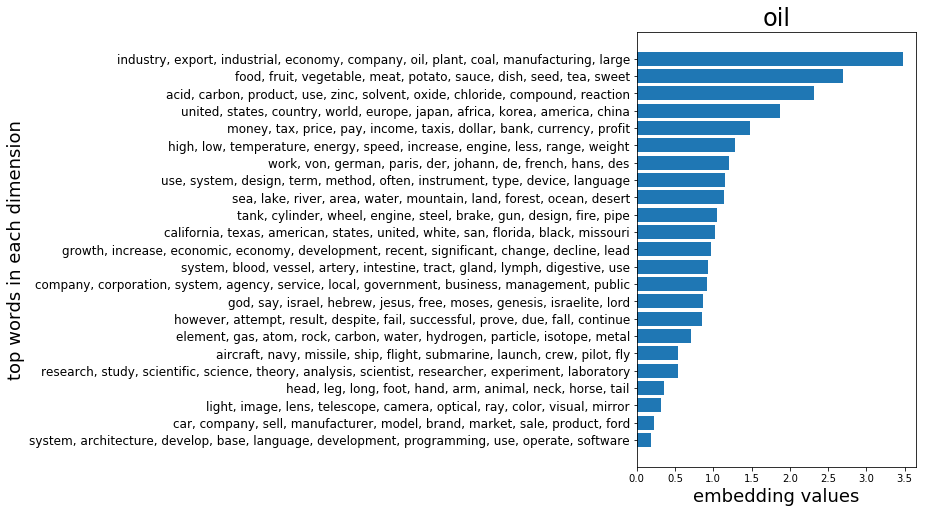

In [2]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import math

query_str = 'oil'

#query_str = 'star'
#query_str = 'fox'
#query_str = 'apple'
#query_str = 'bank'
#query_str = 'tank'
#query_str = 'rock'
#query_str = 'tablet'
#query_str = 'core'
#query_str = 'cable'
#query_str = 'net'
#query_str = 'cell'
#query_str = 'gas'
#query_str = 'plant'
#query_str = 'table'

#query_str = 'run'
#query_str = 'call'
#query_str = 'book'
#query_str = 'crack'
#query_str = 'cook'
#query_str = 'reserve'

#query_str = 'computer'
#query_str = 'planet'
#query_str = 'money'



d_d2_ind = {}
ind_n2_d = []
ind_l2_v = []
d_v_sorted_list = sorted(neighbor_w_int[query_str].items(),key = lambda x:x[1], reverse = True)
#for d, v in neighbor_w_int[query_str].items():
for d, v in d_v_sorted_list:
    if v <= 0.1:
        continue
    d_d2_ind[d] = len(d_d2_ind)
    ind_n2_d.append(d)
    ind_l2_v.append(v)

ind_n2_d = np.array(ind_n2_d)

query_dim = len(d_d2_ind)

plt.figure(figsize=(5, 8))
plt.barh(range(1,query_dim+1),ind_l2_v)
plt.title(query_str, fontsize=24)
plt.ylabel('top words in each dimension', fontsize=18)
plt.xlabel('embedding values', fontsize=18)
plt.gca().invert_yaxis()
#print ind_l2_v

label_list = []
for i in range(query_dim):
    print ', '.join(top_k_words[ind_n2_d[i]][:10])
    label_list.append(', '.join(top_k_words[ind_n2_d[i]][:10]))

plt.gca().set_yticks(np.arange(1,query_dim+1))
plt.gca().set_yticklabels(label_list, fontsize=12)
    
print 
for i in range(query_dim):
    print ', '.join(middle_k_words[ind_n2_d[i]][:10])



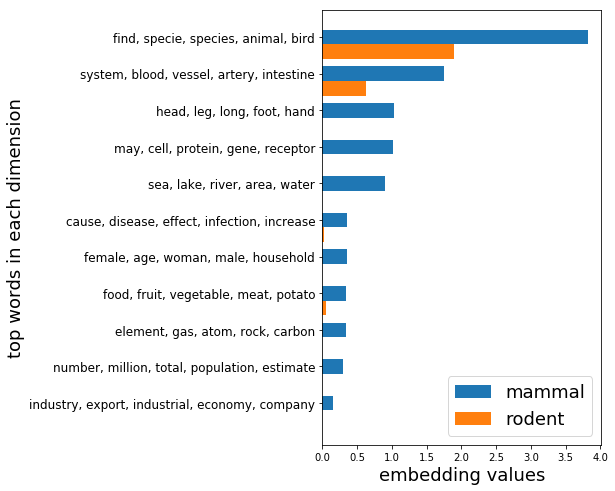

In [3]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
import math

query_str_q = 'rodent'
#query_str_q = 'petroleum'
#query_str_q = 'revolver'
#query_str_q = 'cannon'
#query_str_q = 'bomb'
#query_str_q = 'sword'
#query_str_q = 'cannon'
#query_str_q = 'ant'
#query_str_q = 'insect'
#query_str_q = 'deer'
#query_str_q = 'parrot'
#query_str_q = 'squirrel'
#query_str_q = 'mammal'
#query_str_q = 'essence'
#query_str_q = 'kernel'
#query_str_q = 'center'
#query_str_q = 'nucleus'
#query_str_q = 'lard'
#query_str_q = 'diesel'
#query_str_q = 'gasoline'
#query_str_q = 'grease'
#query_str_q = 'cream'
#query_str_q = 'butter'
#query_str_q = 'wax'



query_str_p = 'mammal'
#query_str_p = 'oil'
#query_str_p = 'pistol'
#query_str_p = 'gun'
#query_str_p = 'weapon'
#query_str_p = 'artillery'
#query_str_p = 'invertebrate'
#query_str_p = 'arthropod'
#query_str_p = 'insect'
#query_str_p = 'bird'
#query_str_p = 'core'

d_pq = []
for d in set(neighbor_w_int[query_str_p].keys()+neighbor_w_int[query_str_q].keys()):
    d_pq_i = [0,0,d]
    if d in neighbor_w_int[query_str_p]:
        d_pq_i[0] = neighbor_w_int[query_str_p][d]
    if d in neighbor_w_int[query_str_q]:
        d_pq_i[1] = neighbor_w_int[query_str_q][d]
    if d_pq_i[0]>0.1 or d_pq_i[1]>0.1:
        d_pq.append(d_pq_i)
    

def compare(x, y):
    if x[0] < y[0]:
        return -1
    if x[0] == y[0]:
    #if x[0] < 0.1 or y[0] < 0.1:
        if x[1] < y[1]:
            return -1
        if x[1] == y[1]:
            return 0
    return 1

d_d2_ind = {}
ind_n2_d = []
ind_l2_pv = []
ind_l2_qv = []
d_pq_sorted_list = sorted(d_pq,cmp =compare, reverse = True)
for pv, qv, d in d_pq_sorted_list:
    d_d2_ind[d] = len(d_d2_ind)
    ind_n2_d.append(d)
    ind_l2_pv.append(pv)
    ind_l2_qv.append(qv)


    
ind_n2_d = np.array(ind_n2_d)

query_dim = len(d_d2_ind)

plt.figure(figsize=(5, 8))
bar_width = 0.4

plt.barh(np.arange(1,query_dim+1),ind_l2_pv,bar_width)
plt.barh(np.arange(1,query_dim+1) + bar_width,ind_l2_qv,bar_width)
plt.gca().invert_yaxis()
plt.legend([query_str_p,query_str_q],fontsize = 18)
plt.ylabel('top words in each dimension', fontsize=18)
plt.xlabel('embedding values', fontsize=18)

label_list = []
for i in range(query_dim):
#    print ', '.join(top_k_words[ind_n2_d[i]][:5])
    label_list.append(', '.join(top_k_words[ind_n2_d[i]][:5]))
print 
plt.gca().set_yticks(np.arange(1,query_dim+1))
plt.gca().set_yticklabels(label_list, fontsize=12)
#for i in range(query_dim):
#    print ', '.join(middle_k_words[ind_n2_d[i]][:5])